# <a name="contents">Задачи исследования — Сборный проект</a>

## [1. Откройте файл с данными и изучите общую информацию](#stage_1)
Путь к файлу:
- /datasets/games.csv
- /datasets/rating.csv — данные о рейтинге ESRB


## [2. Подготовьте данные](#stage_2)
- Замените названия столбцов
- Посчитайте количество продаж во всех регионах и запишите в отдельный столбец

- Приведите данные к нужным типам:
    - Опишите, в каких столбцах пришлось заменить тип данных и почему
    
- Обработайте пропуски при необходимости:
    - Если вы решили заполнить пропуски определённым образом или не заполнять совсем — объясните, почему;
    - Опишите возможные причины возникновения пропусков
    

## [3. Проведите исследовательский анализ данных](#stage_3)
- Постройте распределение по годам релиза и опишите полученный результат
- Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
- Постройте график продаж по каждому году; сделайте вывод
- Постройте ящик с усами по глобальным продажам, опишите полученный результат
- Узнайте, на какой платформе было выпущено больше всего игр
- Определите, игр какого жанра больше всего
- Найдите игры с наибольшей и наименьшей оценкой от пользователей
- Найдите игры с наибольшей и наименьшей оценкой от критиков
- Оцените корреляцию между оценками критиков и пользовательскими оценками


## [4. Составьте портрет пользователя для каждого региона](#stage_4)
Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:
- топ-5 предпочтительных жанров
- в какие года пользователи были наиболее активны (больше всего покупали игры)
- топ-5 предпочтительных платформ
- какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)


## [5. Проверьте гипотезы](#stage_5)
- средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
- средний пользовательский рейтинг жанров Action и Sports различается

Пороговое значение alpha задайте самостоятельно.

Поясните:
- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему


## [6. Напишите общий вывод](#stage_6)
- Общие выводы
- Рекомендации

## Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год релиза
- Genre — жанр игры
- NA_players — продажи игрокам в Северной Америке (в миллионах долларов)
- EU_players — продажи игрокам в Европе (в миллионах долларов)
- RU_players — продажи игрокам в России (в миллионах долларов)
- Other_players — продажи игрокам в других странах
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг ESRB

<a name="stage_1"></a>
# Этап 1. Откроем файлы, импортируем библиотеки
- Изучим общую информацию

[Наверх к оглавлению](#contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
font = {'family': 'sans-serif',
        'color':  '#a72693',
        'weight': 'normal',
        'size': 20,
        }

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
rating = pd.read_csv('/datasets/rating.csv')
rating.tail()

,rating_type,decryption
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


In [8]:
rating.describe()

,rating_type,decryption
count,8,8
unique,8,8
top,T,Для всех старше 10 лет
freq,1,1


In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
rating_type    8 non-null object
decryption     8 non-null object
dtypes: object(2)
memory usage: 256.0+ bytes


Данные выглядят сносно. 

<a name="stage_2"></a>
## 2. Подготовьте данные
- Замените названия столбцов
- Посчитайте количество продаж во всех регионах и запишите в отдельный столбец

- Приведите данные к нужным типам:
    - Опишите, в каких столбцах пришлось заменить тип данных и почему
    
- Обработайте пропуски при необходимости:
    - Если вы решили заполнить пропуски определённым образом или не заполнять совсем — объясните, почему;
    - Опишите возможные причины возникновения пропусков


[Наверх к оглавлению](#contents)

In [10]:
# Заменим названия столбцов
games.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [11]:
cols = ['game_name',
        'platform',
        'year_of_release',
        'genre',
        'na_sales',
        'eu_sales',
        'ru_sales',
        'other_sales',
        'critic_score',
        'user_score',
        'rating_type']
games.set_axis(cols, axis='columns', inplace=True)

In [12]:
rating.columns = ['rating_type', 'descryption']
rating.head()

,rating_type,descryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)


In [13]:
# Считаем количество продаж во всех регионах и запишием в отдельный столбец
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['ru_sales'] + games['other_sales']
games.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E,82.54
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN,40.24
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,35.52
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN,31.38


In [14]:
# Приведем данные к нужным типам
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
game_name          16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
ru_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating_type        9949 non-null object
total_sales        16715 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


In [15]:
games['year_of_release'] = games['year_of_release'].fillna(2077)
games['year_of_release'] = games['year_of_release'].astype('int')

In [16]:
games['year_of_release'] = games['year_of_release'].astype('str')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
</div>

In [17]:
games['sample_date'] = '-01-01'

In [18]:
games['year_of_release'] = games['year_of_release'] + games['sample_date']

In [19]:
games.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales,sample_date
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.00,8,E,82.54,-01-01
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN,40.24,-01-01
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,35.52,-01-01
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.00,8,E,32.77,-01-01
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN,31.38,-01-01


In [20]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y-%m-%d').dt.year
games.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales,sample_date
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E,82.54,-01-01
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN,40.24,-01-01
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,35.52,-01-01
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E,32.77,-01-01
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN,31.38,-01-01


In [21]:
del games['sample_date']

In [22]:
games['year_of_release'].max()

2077

In [23]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [24]:
# tbd мешает приведению к точке с плавающей запятой, посмотрим подробнее
games[games['user_score'] == 'tbd']['user_score'].count()

2424

In [25]:
# Так как это что-то неочевидное и связано с обновлением базы — есть tbd и с 2001 и с 2010 годом, то проставим np.nan
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan

In [26]:
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
game_name          16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
ru_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating_type        9949 non-null object
total_sales        16715 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [27]:
# Проставим строчные буквы в именных столбцах
games['game_name'] = games['game_name'].str.lower()
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower()
games['rating_type'] = games['rating_type'].str.lower()

In [28]:
rating['rating_type'] = rating['rating_type'].str.lower()
rating['descryption'] = rating['descryption'].str.lower()

In [29]:
# --Обработайте пропуски при необходимости
games.duplicated().sum()

0

In [30]:
games.isnull().sum().sort_values(ascending = False) / games.shape[0] * 100

user_score        54.59
critic_score      51.32
rating_type       40.48
genre              0.01
game_name          0.01
total_sales        0.00
other_sales        0.00
ru_sales           0.00
eu_sales           0.00
na_sales           0.00
year_of_release    0.00
platform           0.00
dtype: float64

Заполним оценки нулями, так как нельзя объяснить отсутствия рейтинга. 
Если предположить, что на одной платформе игра рейтинговая, то не факт что она будет таковой на другой платформе.

Игры на разных платформах могут отличаться рейтингом. Даже могут отличаться контентом, поэтому поставим всем общую группу "Вне рейтинга".

In [31]:
games['user_score'] = games['user_score'].fillna(-1)
games['critic_score'] = games['critic_score'].fillna(-1)
games['rating_type'] = games['rating_type'].fillna('out of rating')
games['genre'] = games['genre'].fillna('no genre game')
games['game_name'] = games['game_name'].fillna('no name game')

In [32]:
games.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.00,-1.00,out of rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,out of rating,31.38


<a name="stage_3"></a>
## 3. Проведите исследовательский анализ данных
1. Постройте распределение по годам релиза и опишите полученный результат
2. Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
3. Постройте график продаж по каждому году; сделайте вывод
4. Постройте ящик с усами по глобальным продажам, опишите полученный результат
5. Узнайте, на какой платформе было выпущено больше всего игр
6. Определите, игр какого жанра больше всего
7. Найдите игры с наибольшей и наименьшей оценкой от пользователей
8. Найдите игры с наибольшей и наименьшей оценкой от критиков
9. Оцените корреляцию между оценками критиков и пользовательскими оценками

[Наверх к оглавлению](#contents)

### 1. Постройте распределение по годам релиза и опишите полученный результат


Text(0.5, 1.0, 'Распределение по годам релиза')

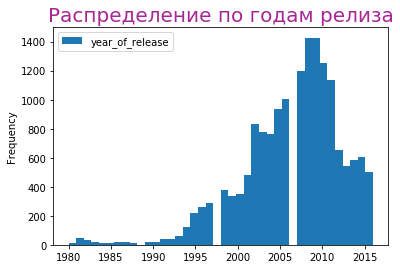

In [33]:
ax = games[games['year_of_release'] != 2077]['year_of_release'].plot(kind='hist', bins=40).legend()
plt.title('Распределение по годам релиза', fontdict=font)

Появились в 80-ых, затем было долго плато — мощностей не хватало, а на текстовых квестах много не заработаешь.
С 95-года росли чипы видеоадаптеров в мощности, соответственно график релизов тоже рос. С 2010 года спад, насыщение рынка, переход на мобильные платформы, ну и, видимо, инвесторы рисковать перестали.

### 2. Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод

Text(0.5, 1.0, 'Отзывы и без отзыва — критики')

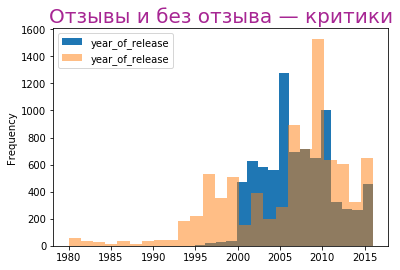

In [34]:
games[(games['year_of_release'] != 2077) & (games['critic_score'] > 0)]['year_of_release'].plot(kind='hist', bins=25).legend()
games[(games['year_of_release'] != 2077) & (games['critic_score'] == -1)]['year_of_release'].plot(kind='hist', bins=25, alpha=0.5).legend()
plt.title('Отзывы и без отзыва — критики', fontdict=font)

Text(0.5, 1.0, 'Отзывы и без отзыва — пользователи')

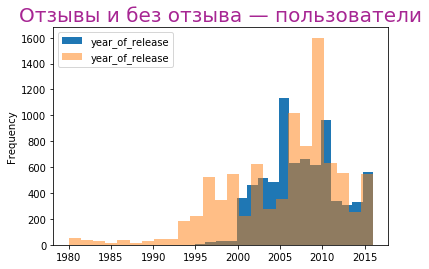

In [35]:
games[(games['year_of_release'] != 2077) & (games['user_score'] > 0)]['year_of_release'].plot(kind='hist', bins=25).legend()
games[(games['year_of_release'] != 2077) & (games['user_score'] == -1)]['year_of_release'].plot(kind='hist', bins=25, alpha=0.5).legend()
plt.title('Отзывы и без отзыва — пользователи', fontdict=font)

Выглядят похожими между собой. Скорее всего, из-за того, что чаще всего критикам выгодно сходится с мнением пользователей.

### 3. Постройте график продаж по каждому году; сделайте вывод


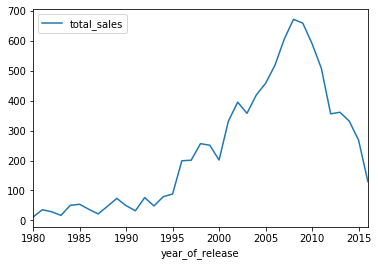

In [36]:
games[games['year_of_release'] != 2077].groupby('year_of_release').agg({'total_sales':'sum'}).plot()

Игровой рынок падает с 2008 года.

### 4. Постройте ящик с усами по глобальным продажам, опишите полученный результат


In [37]:
games.describe()

,year_of_release,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,total_sales
count,"16,715.00","16,715.00","16,715.00","16,715.00","16,715.00","16,715.00","16,715.00","16,715.00"
mean,"2,007.62",0.26,0.15,0.08,0.05,33.06,2.69,0.53
std,10.62,0.81,0.50,0.31,0.19,36.30,4.17,1.55
min,"1,980.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.00
25%,"2,003.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.06
50%,"2,008.00",0.08,0.02,0.00,0.01,-1.00,-1.00,0.17
75%,"2,011.00",0.24,0.11,0.04,0.03,70.00,7.30,0.47
max,"2,077.00",41.36,28.96,10.22,10.57,98.00,9.70,82.54


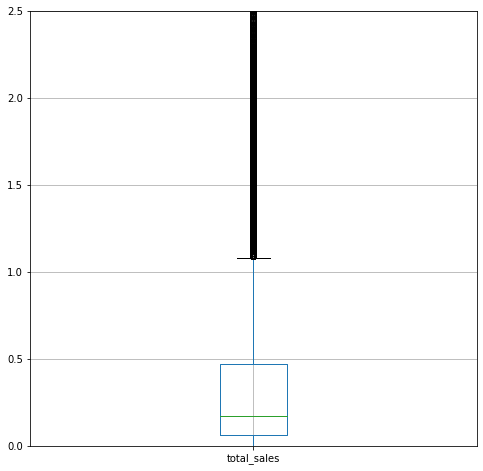

In [38]:
plot = games.boxplot('total_sales', figsize=(8, 8)).set_ylim(0, 2.5)

Все или ничего, в общем обычная судьба игроделов - выпустить какую-нибудь игру и заработать на этом немного деньжат, не факт, что не в минус. Но игровые конгломераты не дремлют и устраивают AAA-выбросы рынку.

### 5. Узнайте, на какой платформе было выпущено больше всего игр

In [39]:
most_popular_platform = games.groupby('platform').agg({'game_name':'count'}).reset_index()
most_popular_platform.sort_values(by='game_name', ascending=False).head()

,platform,game_name
16,ps2,2161
4,ds,2151
17,ps3,1331
25,wii,1320
28,x360,1262


Судя по всему - на Playstation 2.

## 6. Определите, игр какого жанра больше всего

In [40]:
most_popular_genre = games.groupby('genre').agg({'game_name':'count'}).reset_index()
most_popular_genre.sort_values(by='game_name', ascending=False).head()

,genre,game_name
0,action,3369
11,sports,2348
3,misc,1750
8,role-playing,1498
9,shooter,1323


Игр в жанре Экшн больше.

## 7. Найдите игры с наибольшей и наименьшей оценкой:
- от пользователей
- от критиков


Оцените корреляцию между оценками критиков и пользовательскими оценками

In [42]:
games[games['user_score'] > 0].sort_values(by='user_score').head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
13682,myth makers: trixie in toyland,wii,2008,platform,0.04,0.00,0.00,0.00,-1.00,0.20,e,0.04
9970,madden nfl 17,ps3,2016,sports,0.07,0.02,0.00,0.02,-1.00,0.20,e,0.11
5764,happy feet,ds,2006,action,0.27,0.01,0.00,0.02,-1.00,0.30,e,0.30
13380,billy the wizard: rocket broomstick racing,wii,2007,racing,0.04,0.00,0.00,0.00,-1.00,0.30,e,0.04
10262,charlie and the chocolate factory,xb,2005,adventure,0.08,0.02,0.00,0.00,39.00,0.50,e,0.10


In [43]:
games[games['user_score'] > 0].sort_values(by='user_score', ascending = False).head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
14412,breath of fire iii,psp,2005,role-playing,0.00,0.02,0.00,0.01,-1.00,9.70,t,0.03
8975,boktai: the sun is in your hand,gba,2003,role-playing,0.10,0.04,0.00,0.00,83.00,9.60,e,0.14
3417,harvest moon: friends of mineral town,gba,2003,simulation,0.34,0.13,0.11,0.01,81.00,9.60,e,0.59
11119,super puzzle fighter ii,gba,2077,puzzle,0.06,0.02,0.00,0.00,83.00,9.50,e,0.08
10105,cory in the house,ds,2007,action,0.10,0.00,0.00,0.01,-1.00,9.50,e,0.11


In [44]:
games[games['critic_score'] > 0].sort_values(by='critic_score').head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
13689,ride to hell,ps3,2013,racing,0.02,0.01,0.00,0.01,13.00,1.00,m,0.04
10662,leisure suit larry: box office bust,ps3,2009,adventure,0.06,0.03,0.00,0.01,17.00,1.70,m,0.10
12822,ride to hell,x360,2013,racing,0.04,0.01,0.00,0.01,19.00,1.30,m,0.06
10015,rugby 15,ps4,2015,sports,0.04,0.06,0.00,0.02,19.00,3.40,e,0.12
15343,balls of fury,wii,2007,sports,0.02,0.00,0.00,0.00,19.00,2.80,e10+,0.02


In [45]:
games[games['critic_score'] > 0].sort_values(by='critic_score', ascending = False).head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
227,tony hawk's pro skater 2,ps,2000,sports,3.05,1.41,0.02,0.20,98.00,7.70,t,4.68
57,grand theft auto iv,ps3,2008,action,4.76,3.69,0.44,1.61,98.00,7.50,m,10.50
51,grand theft auto iv,x360,2008,action,6.76,3.07,0.14,1.03,98.00,7.90,m,11.00
5350,soulcalibur,dc,1999,fighting,0.00,0.00,0.34,0.00,98.00,8.80,t,0.34
165,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97.00,7.90,m,5.47


In [46]:
critic_score = games[games['critic_score'] != -1]
user_score = games[games['user_score'] != -1]

In [47]:
corr_df = pd.DataFrame()
corr_df['critic_score'] = critic_score['critic_score']
corr_df['user_score'] = user_score['user_score']

In [48]:
corr = corr_df[['critic_score', 'user_score']].corr()
corr.style.format("{:.2%}")

,critic_score,user_score
critic_score,100.00%,58.09%
user_score,58.09%,100.00%


In [49]:
corr.style.background_gradient(cmap='coolwarm')

,critic_score,user_score
critic_score,1,0.580878
user_score,0.580878,1


<a name="stage_4"></a>
## 4. Составьте портрет пользователя для каждого региона
Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:
- топ-5 предпочтительных жанров
- в какие года пользователи были наиболее активны (больше всего покупали игры)
- топ-5 предпочтительных платформ
- какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)


[Наверх к оглавлению](#contents)

### Топ-5 предпочтительных жанров

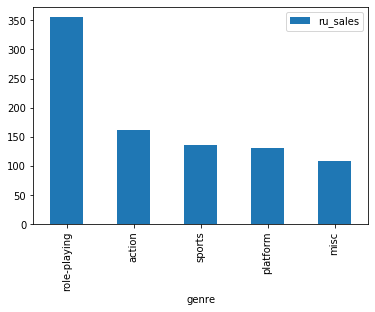

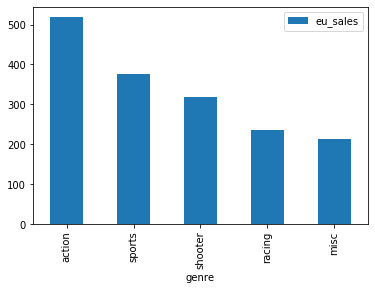

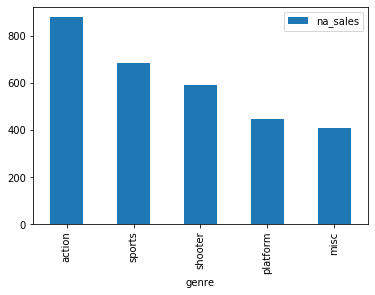

In [50]:
games.groupby(by='genre').agg({'ru_sales':'sum'}).sort_values(by='ru_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

В РФ предпочитают ролевые игры, когда как в Европе и Северной Америке больше средств тратят на экшены.

### В какие года пользователи были наиболее активны (больше всего покупали игры)

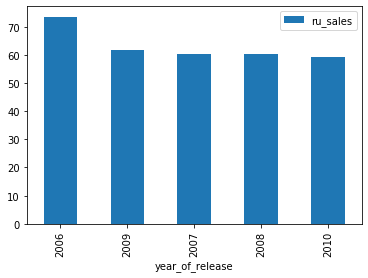

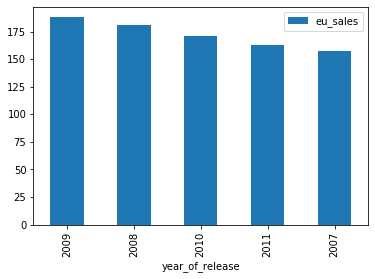

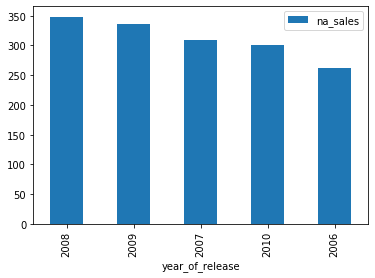

In [51]:
games.groupby(by='year_of_release').agg({'ru_sales':'sum'}).sort_values(by='ru_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='year_of_release').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='year_of_release').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

В общем, когда рынок игровой рос, вот тогда все и покупали игры. +/- глобальный кризис.

### Какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)

In [52]:
games = games.merge(rating, on='rating_type', how='right')

In [53]:
games.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales,descryption
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,e,82.54,для всех
1,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,e,35.52,для всех
2,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,e,32.77,для всех
3,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.00,8.50,e,29.80,для всех
4,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.00,6.60,e,28.91,для всех


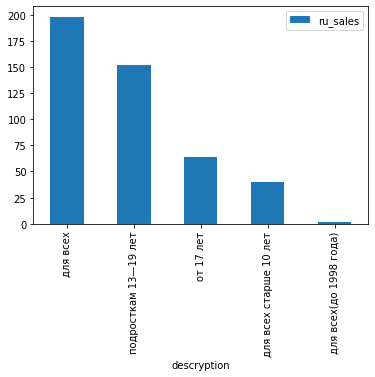

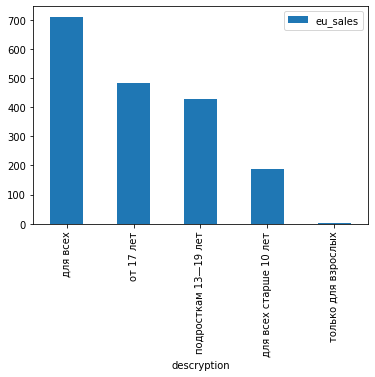

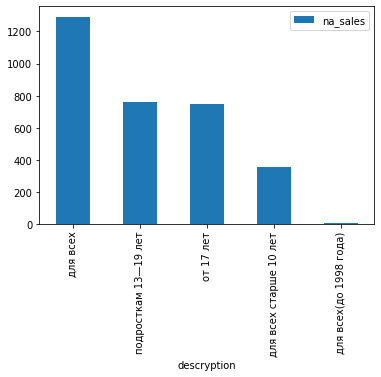

In [54]:
games.groupby(by='descryption').agg({'ru_sales':'sum'}).sort_values(by='ru_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='descryption').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='descryption').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

Группа для всех — лидер в Европе, РФ и США. Логично, так как название группы предполагает максимальный охват.
Дальше начинаются различия.

**В США:** 13-19 лет и 17 лет делят второе и третье место и группы примерно равны между собой.

**В Европе:** 17 и 13-19 лет занимают второе и третье соответственно и группы также примерно равны между собой.

**В РФ:** 13-19 лет и 17 лет делят второе и третье место. И группа в 13-19 лет крупнее более, чем в два раза.

### Топ-5 предпочтительных платформ


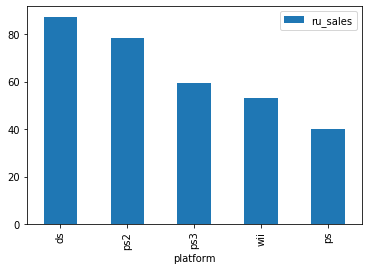

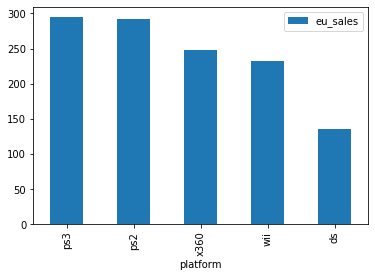

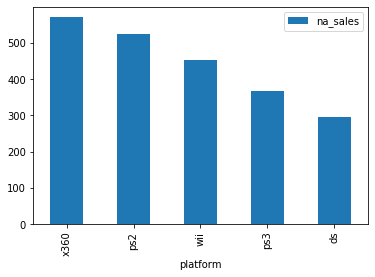

In [55]:
games.groupby(by='platform').agg({'ru_sales':'sum'}).sort_values(by='ru_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

В США доминирует приставки семейства Майкрософт он же. Европа любит приставку Японии. Россия играет в денди.

<a name="stage_5"></a>
## 5. Проверьте гипотезы
- средний пользовательский рейтинг платформ PS2 и PS3 одинаковый
- средний пользовательский рейтинг жанров Action и Sports различается

Пороговое значение alpha задайте самостоятельно.

Поясните:

- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему


[Наверх к оглавлению](#contents)

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

### **Гипотезы:**
- H0: средний пользовательский рейтинг платформ PS2 и PS3 одинаковый
- H1: средний пользовательский рейтинг платформ PS2 и PS3 различается

In [56]:
alpha = 0.05

In [57]:
ps2 = games[(games['platform'] == 'ps2') & (games['user_score'] > 0)]['user_score']
ps3 = games[(games['platform'] == 'ps3') & (games['user_score'] > 0)]['user_score']

In [58]:
results = st.ttest_ind(ps2, ps3)

In [59]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.8164610454202393e-47
Отвергаем нулевую гипотезу


### **Гипотезы:**
- H0: средний пользовательский рейтинг жанров Action и Sports одинаковый 
- H1: средний пользовательский рейтинг жанров Action и Sports различается

In [60]:
action = games[(games['genre'] == 'action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'sports') & (games['user_score'] > 0)]['user_score']

In [61]:
results = st.ttest_ind(action, sports)

In [62]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16924497469003613
Не получилось отвергнуть нулевую гипотезу


<a name="stage_6"></a>
## 6. Напишите общий вывод
Геймдев выглядит печально уж 10 лет как. Тем не менее люди играть не перестали и разработчики тоже выпускают игры, хотя делают это более осмотрительно. Ну и россиянам ролевые игры нравятся.
 
### Рекомендации
- Склеить наборы данных с играми и рейтингами
- Указывать источники отзывов, заполнять набор данных без пропусков 
- Перед тем, как начать делать игру искать спонсора или инвестора


[Наверх к оглавлению](#contents)